In [42]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/women-managers/Proportion of women in senior and middle management positions.csv


In [43]:
import charset_normalizer
with open('/kaggle/input/women-managers/Proportion of women in senior and middle management positions.csv','rb') as fle:
    result = charset_normalizer.detect(fle.read(100000))
    print(result)

{'encoding': 'windows-1250', 'language': 'Spanish', 'confidence': 1.0}


In [44]:
df = pd.read_csv('/kaggle/input/women-managers/Proportion of women in senior and middle management positions.csv',encoding='windows-1250')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   country  1534 non-null   object 
 1   source   1534 non-null   object 
 2   time     1534 non-null   int64  
 3   value    1526 non-null   float64
dtypes: float64(1), int64(1), object(2)
memory usage: 48.1+ KB


In [46]:
df.head()

,country,source,time,value
0,Afghanistan,LFS - Labour Force Survey,2021,NaN
1,Afghanistan,LFS - Labour Force Survey,2020,5.889
2,Afghanistan,HIES - Households Living Conditions Survey,2017,4.255
3,Afghanistan,HIES - Households Living Conditions Survey,2014,6.929
4,Angola,LFS - Employment Survey,2021,11.014


In [47]:
df.describe(include='all')

,country,source,time,value
count,1534,1534,1534.000000,1526.000000
unique,147,64,NaN,NaN
top,Greece,LFS - Labour Force Survey,NaN,NaN
freq,30,577,NaN,NaN
mean,NaN,NaN,2011.969361,30.201258
std,NaN,NaN,6.620628,10.247548
min,NaN,NaN,1991.000000,1.194000
25%,NaN,NaN,2007.000000,23.656500
50%,NaN,NaN,2013.000000,30.891500
75%,NaN,NaN,2018.000000,36.969250


In [48]:
df.isnull().sum()

country    0
source     0
time       0
value      8
dtype: int64

In [49]:
df.dropna(subset=['value'],inplace=True)

In [50]:
df.isnull().sum()

country    0
source     0
time       0
value      0
dtype: int64

In [51]:
maxx = df.groupby('country')['value'].transform(max)

In [52]:
df.loc[df.value==maxx,:]

,country,source,time,value
3,Afghanistan,HIES - Households Living Conditions Survey,2014,6.929
7,Angola,PC - Population Census,2014,18.191
8,Albania,LFS - Labour Force Survey,2019,41.340
22,United Arab Emirates,LFS - Labour Force Survey,2021,23.568
32,Argentina,"LFS - Permanent Household Survey, Urban",2014,38.637
...,...,...,...,...
1499,Samoa,LFS - Labour Force Survey,2017,42.988
1501,Yemen,LFS - Labour Force Survey,2014,4.503
1502,South Africa,LFS - Quarterly Labour Force Survey,2022,36.527
1529,Zambia,LFS - Labour Force Survey,2018,40.207


In [53]:
max_ratio = df.loc[df.value==maxx,:]

<Axes: xlabel='time', ylabel='value'>

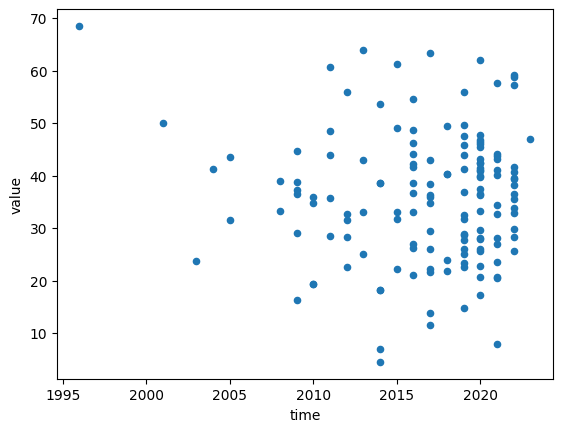

In [54]:
max_ratio.plot(kind='scatter',x='time',y='value')

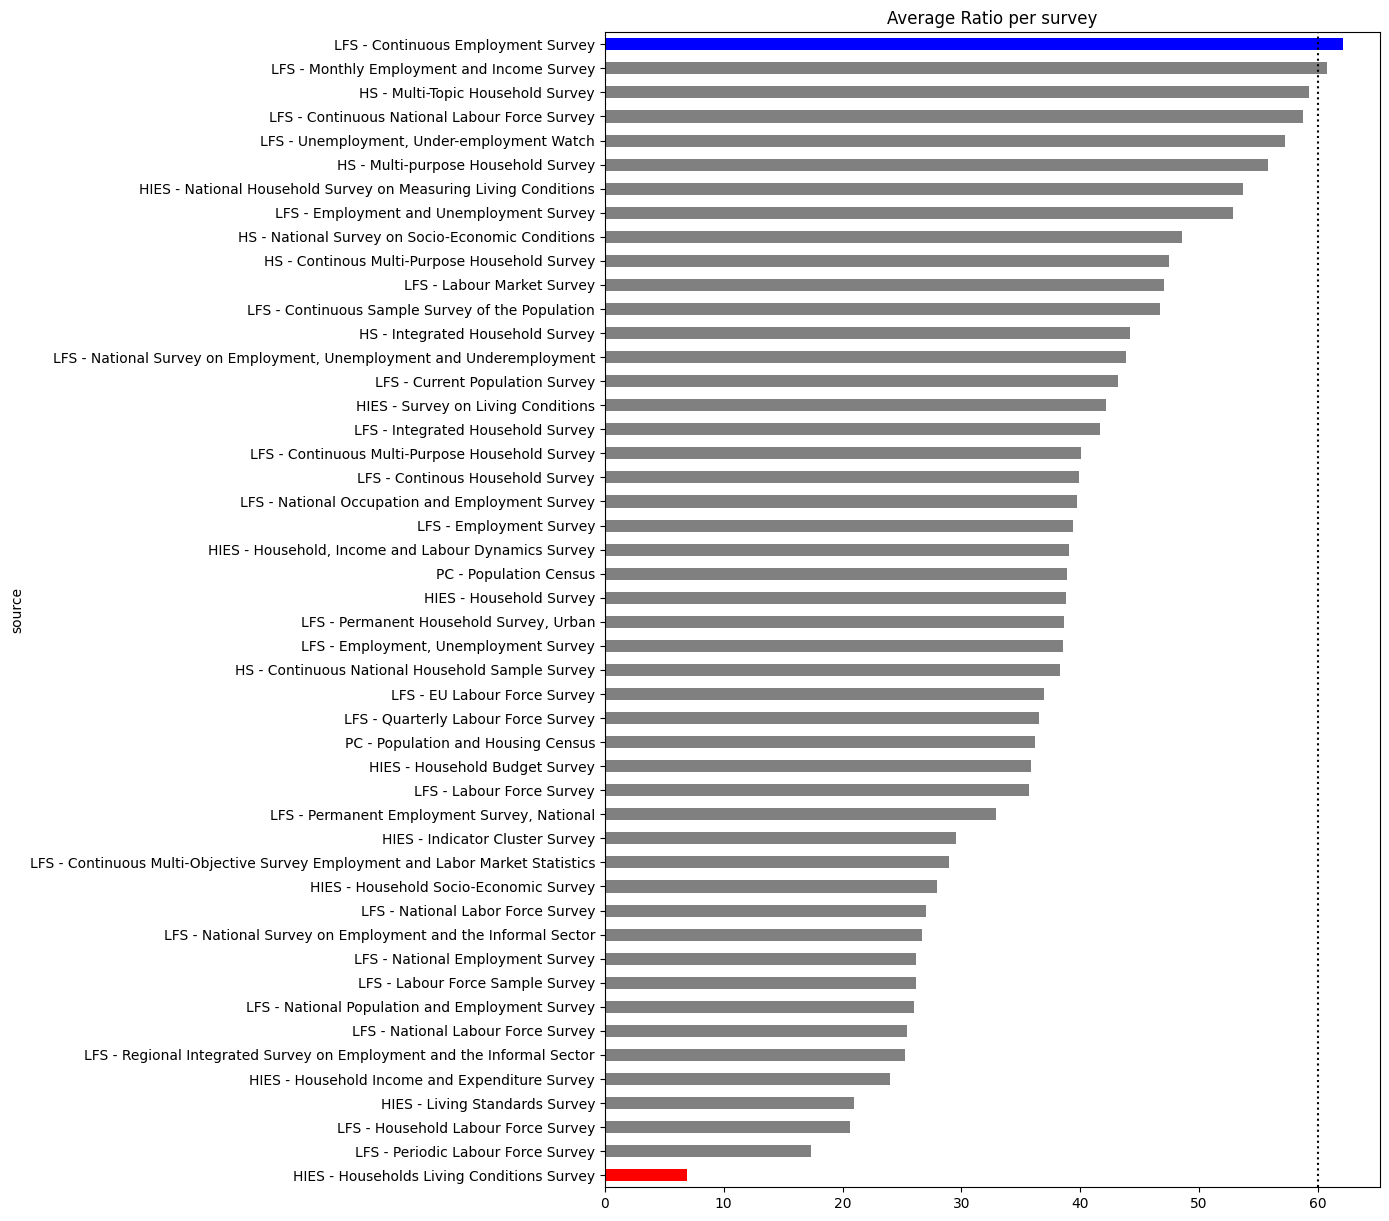

In [55]:
colors = len(max_ratio.groupby('source')['value'].mean())*['grey']
colors[0] = 'red'
colors[-1] = 'blue'
max_ratio.groupby('source')['value'].mean().sort_values().plot(kind='barh',figsize=(10,15),linewidth=3,color=colors,title='Average Ratio per survey', fontsize=10)
plt.axvline(60,color='black',linestyle=':')

In [59]:
df[['time','value']].corr().iloc[0,1]

0.20594130227455948

There is no correlation between year and ratio.